## Individuell inlämningsuppgift – Machine Learning
### Case: California Housing – modellering som beslutsunderlag

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

#### 1. Dataförståelse & EDA (kort men relevant)
 Krav:
Visa datasetets storlek, datatyper och vilka features som finns.
Kontrollera saknade värden och beskriv kort hur du hanterar dem.
Minst 2 relevanta figurer/tabeller + kort tolkning.


In [10]:
data = pd.read_csv("housing.csv")

print("Datasetets storlek:", data.shape)
print("\nDatatyper:\n", data.dtypes)
print("\nFörsta raderna:\n", data.head())


Datasetets storlek: (20640, 10)

Datatyper:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object

Första raderna:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0 

In [14]:
print("Saknade värden per kolumn:\n", data.isnull().sum())

Saknade värden per kolumn:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


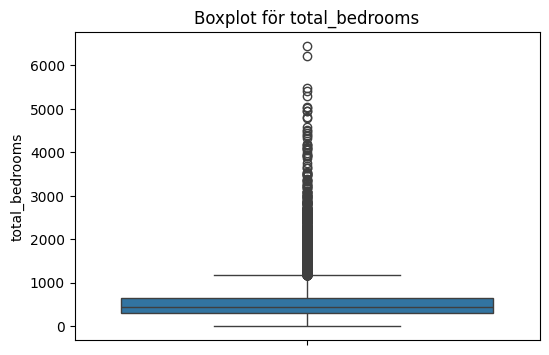

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['total_bedrooms'])
plt.title("Boxplot för total_bedrooms")
plt.show()

I boxplotten syns att kolumnen total_bedrooms innehåller outliers. För att hantera saknade värden väljer jag att fylla dem med medianen. Medianen är mer robust än medelvärdet eftersom den inte påverkas av extremvärden.

In [23]:
# Hantera saknade värden.

data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

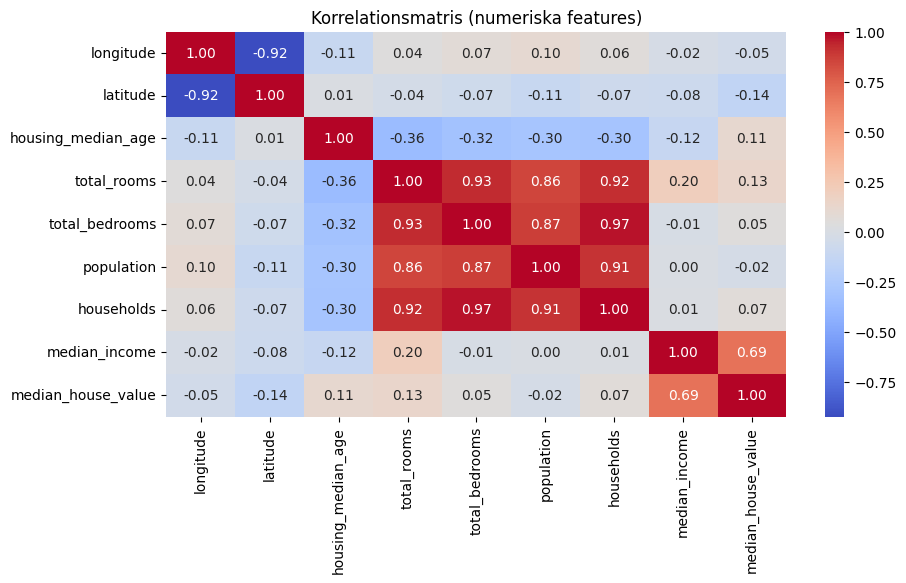

In [30]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatris (numeriska features)")
plt.show()

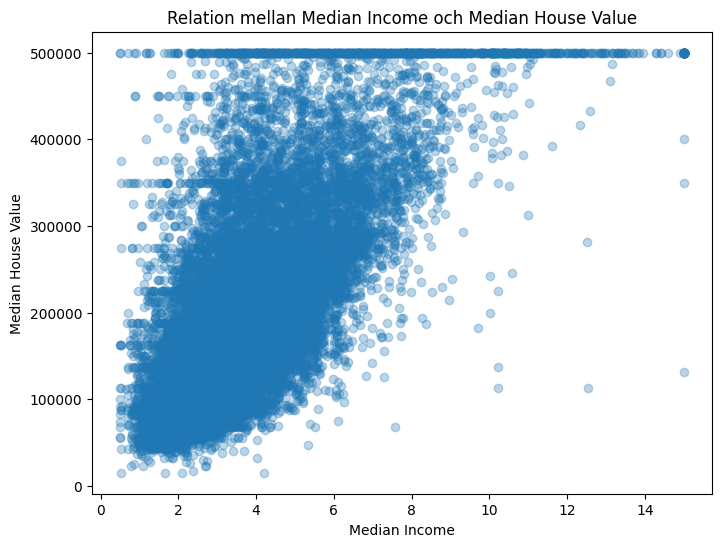

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Relation mellan Median Income och Median House Value")
plt.show()

#### 2) Split + preprocessing
 Krav:
Dela datan i train och test.
Klassificering: använd stratifierad split (stratify) så att klasserna fördelas rimligt i train/test.
Preprocessing ska göras på ett sätt som undviker att testdata påverkar träningen.